##Project Plan
-Starting out on this project I will look into each data file to analyze the data types and see if there are any null values.  From there we will adjust the data types to our liking
-After that, I would like to create some new columns that can give us further detail on the data.  For example, columns on the length of time the client has been with the company and the churn (whether or not they are still with the company).  Then I can look at average duration of customer and it will also allow us to have another data point on how long customers have been with us.
-I will only be merging the customerID's that are contained in every file that way when we model we do not have missing information.
-From there I want to reformat the columns, making it all lowercase and putting underscores between the words.
-Next I want to plot the categorical variables to get a visiualization of the distribution.  I want to see if any are extremely unevenly distributed or if the clients prefer certain offerings of the customer.
##Preparing the data for modeling
-To prepare the data for modeling I am going to seperate the data into different groups: categorical columns, binary columns and numerical columns.  I will use OneHotEncoding for the categorical columns, Ordinal Encoding for the binary columns and scaler for the numerical columns to help the machine learning model better predict the outcomes.
##Running the models
-From there I can split the data into train and target sets, run the preprocessing and models on the information.
-I will run several basic models on the information at first to see which model performs the best without parameters.
-Once I have the best model without parameters I will be tuning it to try and improve the AUC-ROC score further.


#Below I am printing the data frames for each file to see the data types and if any NA items exist.

In [1]:
import pandas as pd
import numpy as np

contract = pd.read_csv(r'C:\Users\K\OneDrive\Documents\Triple Ten Projects\Sprint Project 17\contract.csv')
print(contract.info())
print()
print(contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11

In [2]:
internet = pd.read_csv(r'C:\Users\K\OneDrive\Documents\Triple Ten Projects\Sprint Project 17\internet.csv')
print(internet.info())
print()
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes

In [3]:
personal = pd.read_csv(r'C:\Users\K\OneDrive\Documents\Triple Ten Projects\Sprint Project 17\personal.csv')
print(personal.info())
print(personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


In [4]:
phone = pd.read_csv(r'C:\Users\K\OneDrive\Documents\Triple Ten Projects\Sprint Project 17\phone.csv')
print(phone.info())
print(phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


In [5]:
#Analyzing average duration and using feature engineering to create a new variable
cancelled_contracts = contract[contract['EndDate'] != 'No']
cancelled_contracts['BeginDate'] = pd.to_datetime(cancelled_contracts['BeginDate'])
cancelled_contracts['EndDate'] = pd.to_datetime(cancelled_contracts['EndDate'])

cancelled_contracts['duration'] = cancelled_contracts['EndDate'] - cancelled_contracts['BeginDate']

average_duration = cancelled_contracts['duration'].mean()
print("Average Duration:", average_duration)                                                

Average Duration: 547 days 08:26:57.977528088


C:\Users\K\AppData\Local\Temp\ipykernel_12588\1486376297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_contracts['BeginDate'] = pd.to_datetime(cancelled_contracts['BeginDate'])
C:\Users\K\AppData\Local\Temp\ipykernel_12588\1486376297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_contracts['EndDate'] = pd.to_datetime(cancelled_contracts['EndDate'])
C:\Users\K\AppData\Local\Temp\ipykernel_12588\1486376297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [6]:
#Merging all the datasets into one to reformat columns and prepare processing or machine learning model
data_merged = pd.merge(
    pd.merge(
        pd.merge(contract, internet, on='customerID', how='left'),
        personal, on='customerID', how='left'
    ),
    phone, on='customerID', how='left'
)
data_merged['TotalCharges'] = pd.to_numeric(data_merged['TotalCharges'], errors='coerce')
print(data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [8]:
data_merged['TotalCharges'] = data_merged['TotalCharges'].fillna(0)
na_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in na_cols:
    data_merged[col] = data_merged[col].fillna('Unknown')

print(data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [9]:
#Adjust column headers to be lowercase and putting underscore between words
import re
def format_columns(col):
    return re.sub(r'([a-z])([A-Z])', r'\1_\2', col).lower()

data_merged.columns = [format_columns(col).lower() for col in data_merged.columns]

print(data_merged.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')


In [10]:
#Changing datatypes of dates column to create duration column in merged dataframe
data_merged['begin_date'] = pd.to_datetime(data_merged['begin_date'])
data_merged['end_date'] = pd.to_datetime(data_merged['end_date'], errors='coerce')
print(data_merged.head(10))

  customer_id begin_date   end_date            type paperless_billing  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month               Yes   
1  5575-GNVDE 2017-04-01        NaT        One year                No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month               Yes   
3  7795-CFOCW 2016-05-01        NaT        One year                No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month               Yes   
5  9305-CDSKC 2019-03-01 2019-11-01  Month-to-month               Yes   
6  1452-KIOVK 2018-04-01        NaT  Month-to-month               Yes   
7  6713-OKOMC 2019-04-01        NaT  Month-to-month                No   
8  7892-POOKP 2017-07-01 2019-11-01  Month-to-month               Yes   
9  6388-TABGU 2014-12-01        NaT        One year                No   

              payment_method  monthly_charges  total_charges internet_service  \
0           Electronic check            29.85          29.85              DSL   
1               Mailed check      

C:\Users\K\AppData\Local\Temp\ipykernel_12588\514729972.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_merged['end_date'] = pd.to_datetime(data_merged['end_date'], errors='coerce')


In [11]:
#Adding date for when data is verified by then creating duration and months columns for more variables
data_merged['new_end_date'] = data_merged['end_date'].fillna(pd.Timestamp('2020-02-01'))

data_merged['duration'] = data_merged['new_end_date'] - data_merged['begin_date']

data_merged['duration_months'] = (data_merged['duration'].dt.days / 30.44)
data_merged['duration'] = data_merged['duration'].dt.days
print(data_merged.head())

  customer_id begin_date   end_date            type paperless_billing  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month               Yes   
1  5575-GNVDE 2017-04-01        NaT        One year                No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month               Yes   
3  7795-CFOCW 2016-05-01        NaT        One year                No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month               Yes   

              payment_method  monthly_charges  total_charges internet_service  \
0           Electronic check            29.85          29.85              DSL   
1               Mailed check            56.95        1889.50              DSL   
2               Mailed check            53.85         108.15              DSL   
3  Bank transfer (automatic)            42.30        1840.75              DSL   
4           Electronic check            70.70         151.65      Fiber optic   

  online_security  ... streaming_tv streaming_movies  gender senior_citize

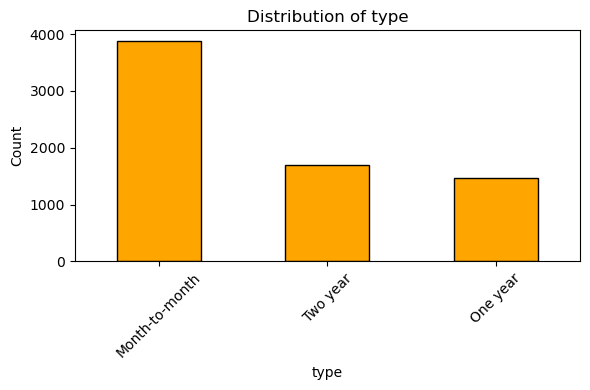

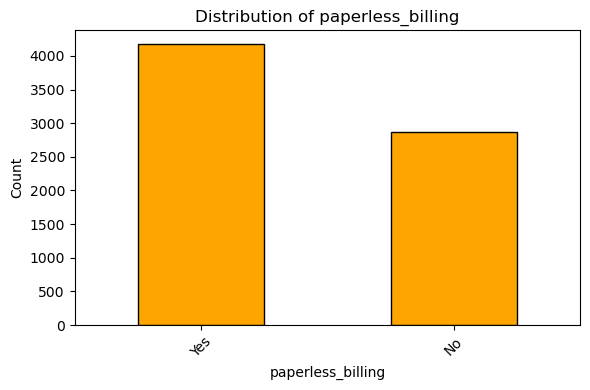

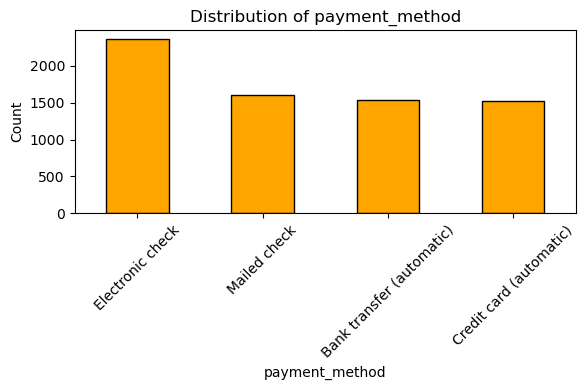

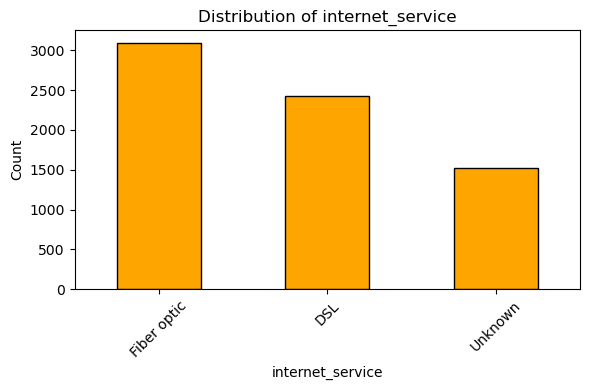

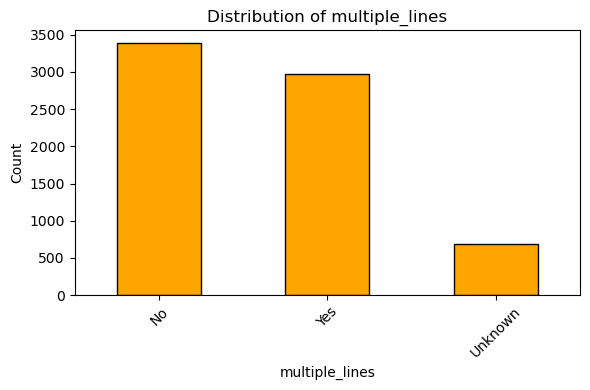

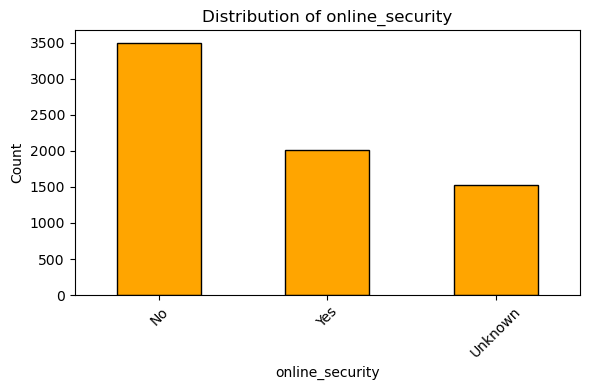

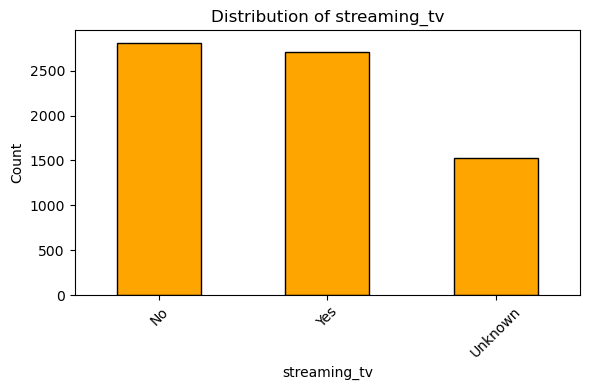

In [12]:
#Analyzing the differences in categorical variables to get an idea of what the distributions look like
import pandas as pd
import matplotlib.pyplot as plt


selected_object_columns = ['type', 'paperless_billing', 'payment_method', 'internet_service', 'multiple_lines', 'online_security', 'streaming_tv']

for col in selected_object_columns:
    if data_merged[col].dtype == 'object':
        data_merged[col] = data_merged[col].astype('category')

for col in selected_object_columns:
    plt.figure(figsize=(6, 4))
    data_merged[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

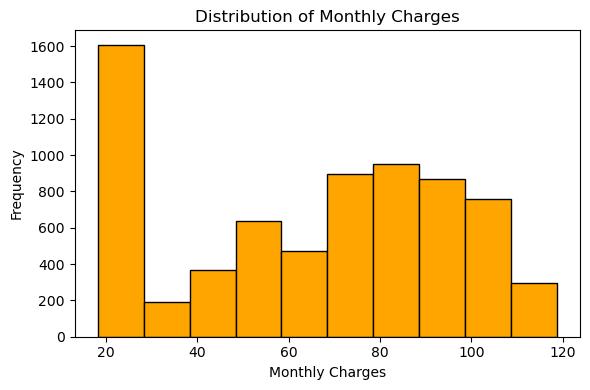

In [13]:
#Analyzing distribution of monthly charges
plt.figure(figsize=(6, 4))
data_merged['monthly_charges'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
#Changing data types and filling the 3 NA values to help with machine learning model
data_merged['duration_months'] = data_merged['duration_months'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               7043 non-null   category
 1   paperless_billing  7043 non-null   category
 2   payment_method     7043 non-null   category
 3   monthly_charges    7043 non-null   float64 
 4   total_charges      7043 non-null   float64 
 5   internet_service   7043 non-null   category
 6   online_security    7043 non-null   category
 7   online_backup      7043 non-null   object  
 8   device_protection  7043 non-null   object  
 9   tech_support       7043 non-null   object  
 10  streaming_tv       7043 non-null   category
 11  streaming_movies   7043 non-null   object  
 12  gender             7043 non-null   object  
 13  senior_citizen     7043 non-null   int64   
 14  partner            7043 non-null   object  
 15  dependents         7043 non-null   object  
 16  multip

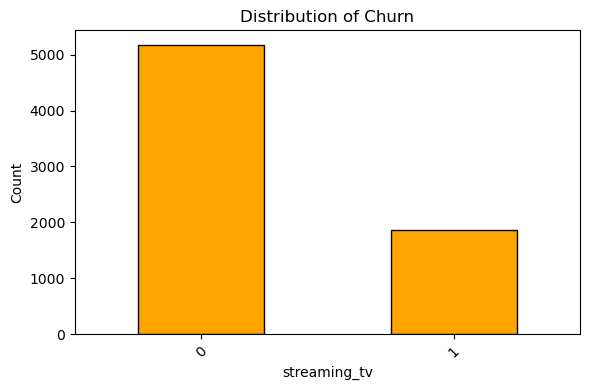

In [16]:
#Preparing precossing models and splitting data into training and test data then plotting distribution of churn to see what percentage of clients have left
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


data_merged['churn'] = data_merged['end_date'].notna().astype(int)

X = data_merged.drop(columns=['begin_date', 'end_date', 'new_end_date', 'customer_id', 'churn'])
y = data_merged['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12345, test_size=0.2)

print(X.info())
plt.figure(figsize=(6, 4))
data_merged['churn'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title(f'Distribution of Churn')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#Grouping columns into the type of data they contain to prepare it for the preprocessor.
#Categorical columns will be using OneHotEncoder, Binary columns Ordinal Encoder and Numerical Columns will be using scaler
categorical_cols = ['type', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection',
'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']
binary_cols = ['paperless_billing', 'partner', 'dependents']
gender_col = ['gender']
numeric_cols = ['monthly_charges', 'total_charges', 'duration_months', 'duration']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('bin', OrdinalEncoder(categories=[['No', 'Yes']] * len(binary_cols)), binary_cols),
    ('gender_ord', OrdinalEncoder(categories=[['Female', 'Male']]), gender_col),
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')  # keeps senior_citizen and any other numeric untouched


In [18]:
#Preparing base models to get an idea of which model performs the best without any parameter tuning
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    print(f"{name} AUC-ROC: {auc:.4f}")

Logistic Regression AUC-ROC: 0.8450
Random Forest AUC-ROC: 0.8418
Gradient Boosting AUC-ROC: 0.8787
Support Vector Machine AUC-ROC: 0.7944


In [19]:
#Based on information above Gradient Boosting model is the best predictor.  I will use a gradient boosting model with tuning to try and improve the performance further.
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingClassifier(random_state=12345)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gb_model)
])

param_grid = {
    'classifier__n_estimators': [300, 400, 500],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 3, 5],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best AUC-ROC Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_proba)
print("Test Set AUC-ROC:", auc_test)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best AUC-ROC Score: 0.883801246020578
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500}
Test Set AUC-ROC: 0.8724405177090598


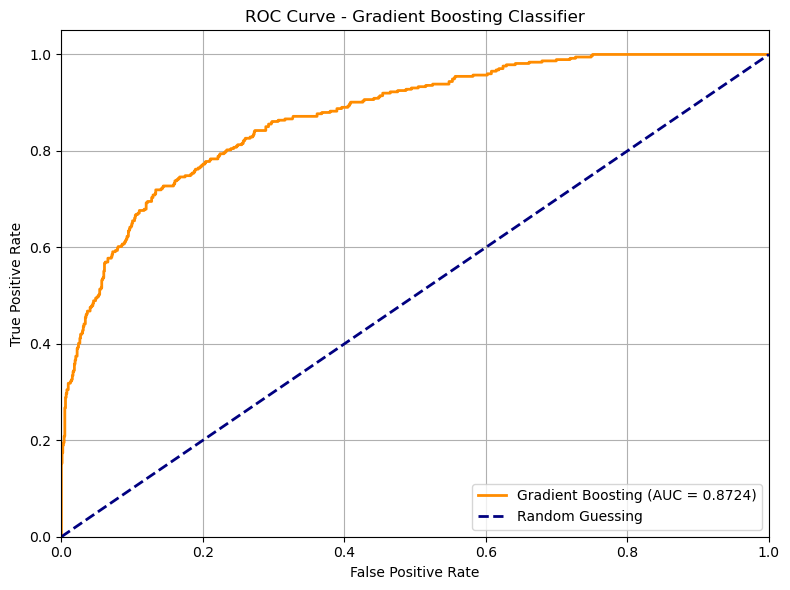

In [20]:
from sklearn.metrics import roc_curve, auc
#Plotting AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

##Project Report
Based on the information found from the gradient boosting machine learning model we developed a model with an AUC-ROC score above 0.87 for the test data.
I did by combining the files together and only using the customerID's that are contained in every file to avoid missing data.
From there we reformatted the data and used encoding and scaling on the data to help the machine learning model perform better.
I used feature engineering by adding the duration of months and duration of days the client has been with the company.
Also created the churn variable to base the models off whether or not the client has left the company.
Given all this we created a fairly accurate model of 0.87 AUC ROC.

##Work Plan
Would model perform better if we balanced the churn data?
    -Currently around ~66% of the churn data is 0 which is slightly imbalanced and could lead to misleading scores for our models.
    -We can over sample the 1 values using SMOTE in churn to get balanced classes then see how the model performs with the new information.
    -Based off the new model on the balanced data we may have to switch how we prepared our data for the modeling.

Would more feature engineering improve the model?
    -If we added additional variables like length of time the company had a customer before they cancelled would it improve the model?  
    We could create an additional variable on IF they cancelled their plan what was the length of time they were a customer.
    -We could create a variable of average monthly charges by taking the total charges by months they've been a customer.  Could be likely the higher charged clients cancel more.
    

#Solution Report
-The following steps were used:
    1.) merging all data into one data frame
    2.) Filled NA's with Unknown or 0
    3.) Charged total charges to float data type
    4.) Changed date columns to datetime to calculate months and days columns
    5.) Graphed object columns to see what the distributions looked like
    6.) Created churn column for ML predictions
    7.) Changed the data types to work for ML models
    8.) Ran test train split to get my data into X,Y data frames to run ML models on
    9.) Created preprocessing steps with OneHotEncoding, OrdinalEncoding and Scaler to help improve ML predictions
    10.) Ran several base models on the data
    11.) Picked best performing based model then tuned it with hyperparameters (GridSearch) to attempt to further improve its performance


-Difficulties
    1.) Some difficulties I encountered were how to deal with the customer ID not being on every file, originally I just only used the customer IDs on every file but once I went back and used every customer ID and filled NA's with unknown my model performance improved.
    2.) Another difficulty was deciding how to preprocess the data since all the column types had differing data types and information.  Using ordinal encoding for all binary variables, one hot encoding for all categorical variables and scaler for all numerical variables helped me to improve the performance of the model.


-Final Model
    1.)  The final model was a decision tree classifier model using gradient boosting and grid search to tune hyperparameters.
    2.)  The model got us an AUC-ROC score 0.87 which was adequate for the project.